https://towardsdatascience.com/decision-tree-algorithm-for-multiclass-problems-using-python-6b0ec1183bf5

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import graphviz 
from sklearn import tree

import matplotlib.pyplot as plt

In [1]:
data = pd.read_csv('data_normalized.csv')
data.head(5)

NameError: name 'pd' is not defined

In [3]:
def split_data(data_x: np.ndarray, data_y: np.ndarray):
    
    ordering = np.arange(data_x.shape[0])
    np.random.shuffle(ordering)
    data_x = data_x[ordering]
    data_y = data_y[ordering]
    
    valid_start = int(len(data_x) * 0.7)
    test_start = int(len(data_x) * 0.9)
    
    train_set = (data_x[:valid_start], data_y[:valid_start])
    valid_set = (data_x[valid_start:test_start], data_y[valid_start:test_start])
    test_set = (data_x[test_start:], data_y[test_start:])
    
    return train_set, valid_set, test_set

In [4]:
y = np.array(data['target'])
x = np.array(data.drop(['target'], axis=1))

train_set, valid_set, test_set = split_data(x,y)

x_train = train_set[0]
y_train = train_set[1]

x_val = valid_set[0]
y_val = valid_set[1]

x_test = test_set[0]
y_test = test_set[1]

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(2073, 150)
(592, 150)
(297, 150)


## SVN

In [5]:
n=24
depth_arr = np.linspace(2, 25, 24)
train_accuracy = np.zeros(n)
val_accuracy = np.zeros(n)

for ind, depth in enumerate(depth_arr):    
    
    clf = tree.DecisionTreeClassifier(max_depth=depth, criterion='entropy', splitter='best')
    clf = clf.fit(x_train, y_train)

    
    output = clf.predict(x_train)
    target = y_train
    train_accuracy[ind] =sum(output == target)/ len(target)
    
    output = clf.predict(x_val)
    target = y_val
    val_accuracy[ind] =sum(output == target)/ len(target)

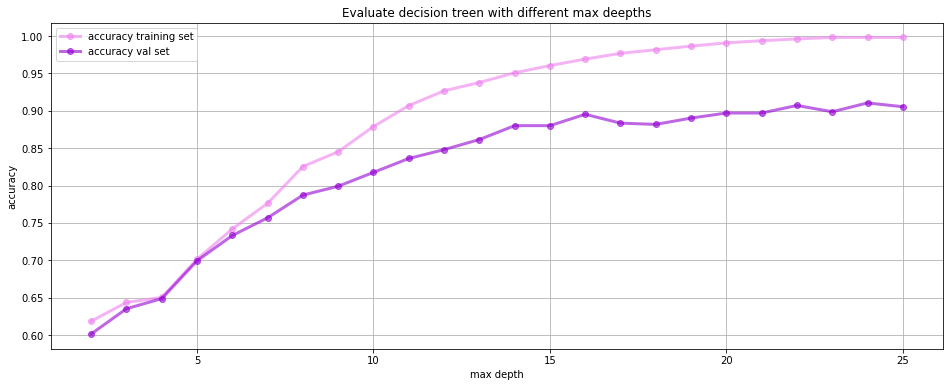

In [6]:
# Plotting
plt.figure(figsize=(16, 6))

plt.plot(depth_arr, train_accuracy, 'bo-', label=r'accuracy training set', color="violet", alpha=0.6, linewidth=3)
plt.plot(depth_arr, val_accuracy, 'bo-', label=r'accuracy val set', color="darkviolet", alpha=0.6, linewidth=3)

plt.xlabel('max depth'); plt.ylabel(r'accuracy')
plt.title(r'Evaluate decision treen with different max deepths')
plt.legend(loc='best')
plt.grid()

In [7]:
## Basically, after max_depth = 13 nothing better happens

clf = tree.DecisionTreeClassifier(max_depth=13, criterion='entropy', splitter='best')
clf = clf.fit(x_train, y_train)

output = clf.predict(x_val)
target = y_val
accuracy =sum(output == target)/ len(target)
print("Accuracy on validation set: {:.2f} %".format(accuracy*100))

Accuracy on validation set: 85.64 %


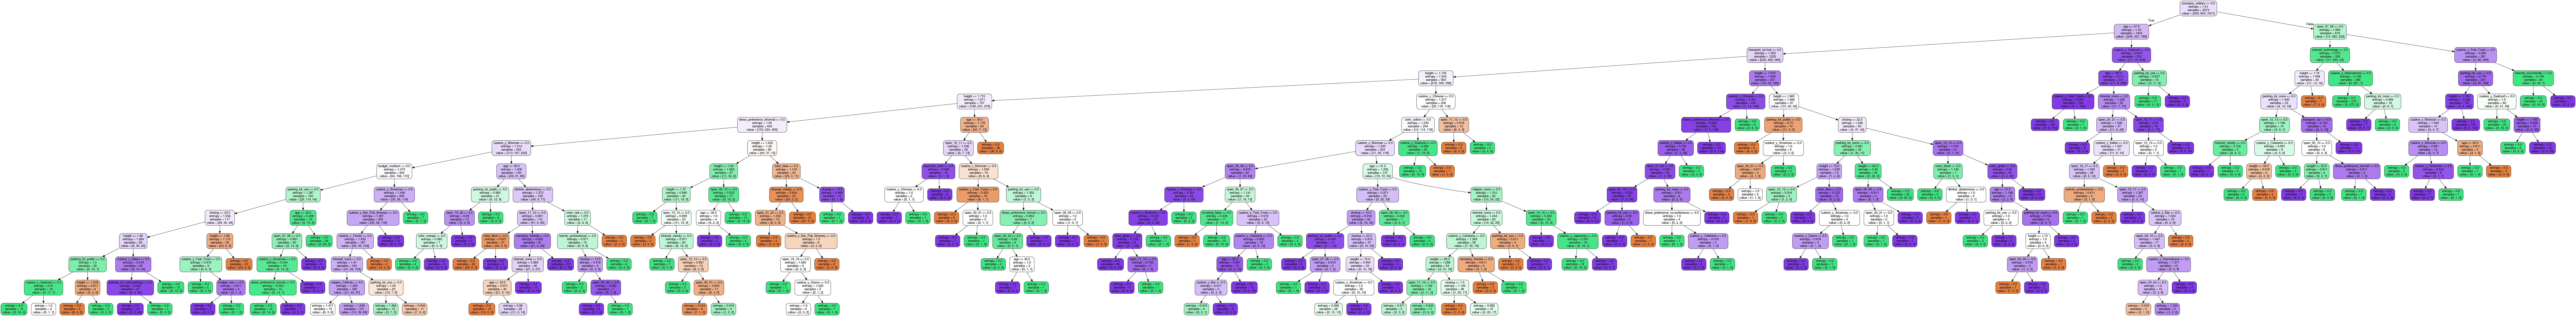

In [8]:
feature_names = list(data.columns)[:-1]

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names,filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

## START WITH ENSEMBLING METHODS

In [9]:
from sklearn.metrics import accuracy_score


In [10]:
def create_bootstrap_data():
    bootstrap_ids = np.random.randint(0, len(x_train), size=len(x_train))
    return x_train[bootstrap_ids,:], y_train[bootstrap_ids]

In [11]:
def build_classifier(data_set, labels, max_depth):
    decision_tree = tree.DecisionTreeClassifier(max_depth = max_depth )
    decision_tree.fit(data_set, labels)
    return decision_tree

In [12]:
def build_classifiers(cases, max_depth):
    classifiers = []
    for case in range(cases):
        bootstrap_set, bootstrap_labels = create_bootstrap_data()
        classifier = build_classifier(bootstrap_set, bootstrap_labels, max_depth)
        classifiers.append(classifier)
    return classifiers

In [13]:
def vote(classifiers, test_data):
    output = []
    for classifier in classifiers:
        output.append(classifier.predict(test_data))
    output = np.array(output)
    predicted = []
    for i in range(len(test_data)):
        classified = output[:, i]
        counts = np.bincount(classified)
        predicted.append(np.argmax(counts))
    return predicted

In [14]:
m = 10
max_depth = 13
classifiers = build_classifiers(m, max_depth)
predicted = vote(classifiers, x_val)
accuracy = accuracy_score(y_val, predicted)
print("Accuracy on validation set: {:.2f} %".format(accuracy*100))

Accuracy on validation set: 91.89 %


In [15]:
m_arr = np.arange(10, 100, 10)max_depth = 13
depth_arr = np.linspace(2, 25, 24)

for m in m_arr:
    for max_depth in depth_arr:
        classifiers = build_classifiers(m, max_depth)
        predicted = vote(classifiers, x_val)
        accuracy = accuracy_score(y_val, predicted)
        print("Accuracy on validation set: {:.2f} using m={:} and depth = {:}".format(accuracy*100, m, max_depth))

SyntaxError: invalid syntax (<ipython-input-15-be7545cfdc6e>, line 1)

In [ ]:

m_arr